# Modules

In this section, necessary modules and libraries were installed.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.5 MB/s 
     |████████████████████████████████| 596 kB 12.9 MB/s 
     |████████████████████████████████| 102 kB 70.6 MB/s 
     |████████████████████████████████| 690 kB 54.0 MB/s 
     |████████████████████████████████| 4.7 MB 59.3 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 64.6 MB/s 
     |████████████████████████████████| 38.1 MB 515 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=85139aa92b2ec9b1b8157a6a5b1512c8981d33daefd5f5f0d75e2ae2deaeb744
  Stored in directory: /tmp/pip-ephem-wheel-cache-dbuf5zr7/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7936442ab9d2b52037455802dbbda5503a6826e0a3190bbf2e

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from pandas_profiling import ProfileReport
from google.colab import drive
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Entry

Data was imported and merged into one Pandas DataFrame.

In [ ]:
#drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('2018gepctresults-cleaned.csv')
area = pd.read_csv('/Alaska Shp to Area.csv')

In [ ]:
union = pd.merge(df, area, how='outer')

# Data Exploration

EDA was conducted to see what the data consisted of and the correlation between variables.

In [ ]:
union.head()

,ap_precinct,ap_canidx,ap_full_can_nam,ap_last_nam_init,ap_maj_ptycod_align,votes,state_precinct_name,state_districtid,vote_method,dist_area,area_units
0,1,1,Mark Begich,Begich,D,399,01-446 Aurora,1,Election Day,21440077.5,square meters
1,1,2,Mike Dunleavy,Dunleavy,R,427,01-446 Aurora,1,Election Day,21440077.5,square meters
2,1,4,Billy Toien,Toien,LB,29,01-446 Aurora,1,Election Day,21440077.5,square meters
3,1,3,Bill Walker,Walker,UL,11,01-446 Aurora,1,Election Day,21440077.5,square meters
4,2,1,Mark Begich,Begich,D,65,01-455 Fairbanks No. 1,1,Election Day,21440077.5,square meters


In [ ]:
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2243
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ap_precinct          2244 non-null   int64  
 1   ap_canidx            2244 non-null   int64  
 2   ap_full_can_nam      2244 non-null   object 
 3   ap_last_nam_init     2244 non-null   object 
 4   ap_maj_ptycod_align  2244 non-null   object 
 5   votes                2244 non-null   int64  
 6   state_precinct_name  2244 non-null   object 
 7   state_districtid     2244 non-null   int64  
 8   vote_method          2244 non-null   object 
 9   dist_area            2244 non-null   float64
 10  area_units           2244 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 210.4+ KB


In [ ]:
union.shape

(2244, 11)

In [ ]:
union.columns

Index(['ap_precinct', 'ap_canidx', 'ap_full_can_nam', 'ap_last_nam_init',
       'ap_maj_ptycod_align', 'votes', 'state_precinct_name',
       'state_districtid', 'vote_method', 'dist_area', 'area_units'],
      dtype='object')

In [ ]:
union.isnull().sum()

ap_precinct            0
ap_canidx              0
ap_full_can_nam        0
ap_last_nam_init       0
ap_maj_ptycod_align    0
votes                  0
state_precinct_name    0
state_districtid       0
vote_method            0
dist_area              0
area_units             0
dtype: int64

In [ ]:
union.corr()

,ap_precinct,ap_canidx,votes,state_districtid,dist_area
ap_precinct,1.000000e+00,-1.739009e-16,0.030805,5.442211e-01,1.482495e-01
ap_canidx,-1.739009e-16,1.000000e+00,-0.484585,-3.048956e-16,-1.914049e-16
votes,3.080516e-02,-4.845854e-01,1.000000,-1.263396e-01,-2.543104e-01
state_districtid,5.442211e-01,-3.048956e-16,-0.126340,1.000000e+00,3.510451e-01
dist_area,1.482495e-01,-1.914049e-16,-0.254310,3.510451e-01,1.000000e+00


In [ ]:
report = ProfileReport(union)
report

Output hidden; open in https://colab.research.google.com to view.

# Exploratory Figures

These allow for better visualization of the data following EDA.

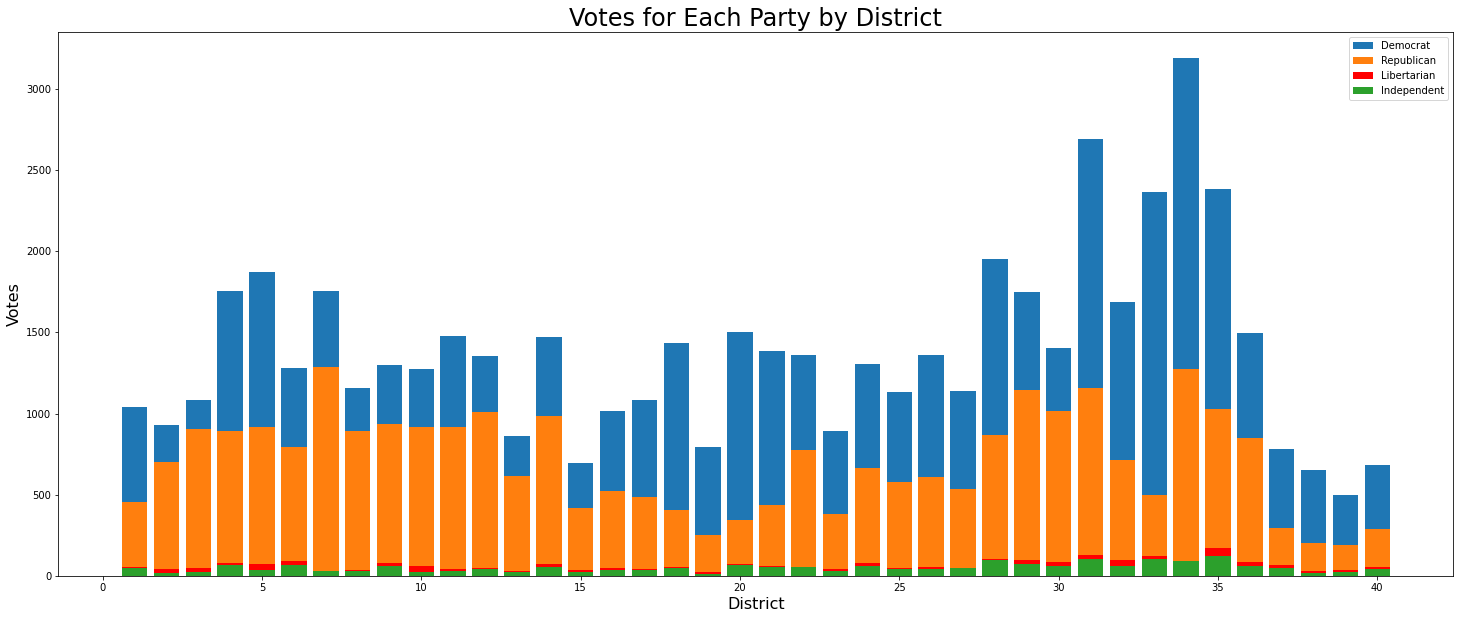

In [ ]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (25,10)

sns.color_palette('tab10')

# make the data for the visual
D = df[df['ap_last_nam_init'] == 'Begich']
R = df[df['ap_last_nam_init'] == 'Dunleavy']
LB = df[df['ap_last_nam_init'] == 'Toien']
UL = df[df['ap_last_nam_init'] == 'Walker']

# plot in a stack manner
plt.bar(D['state_districtid'], D['votes'], bottom = R['votes'], label = 'Democrat')
plt.bar(R['state_districtid'], R['votes'], bottom = LB['votes'], label = 'Republican')
plt.bar(LB['state_districtid'],LB['votes'], bottom = UL['votes'], label = 'Libertarian', color='r')
plt.bar(UL['state_districtid'],UL['votes'], label = 'Independent')

# make legend
plt.xlabel('District', fontsize=16)
plt.ylabel('Votes', fontsize=16)
plt.title('Votes for Each Party by District', fontsize=24)
plt.legend()

plt.show()

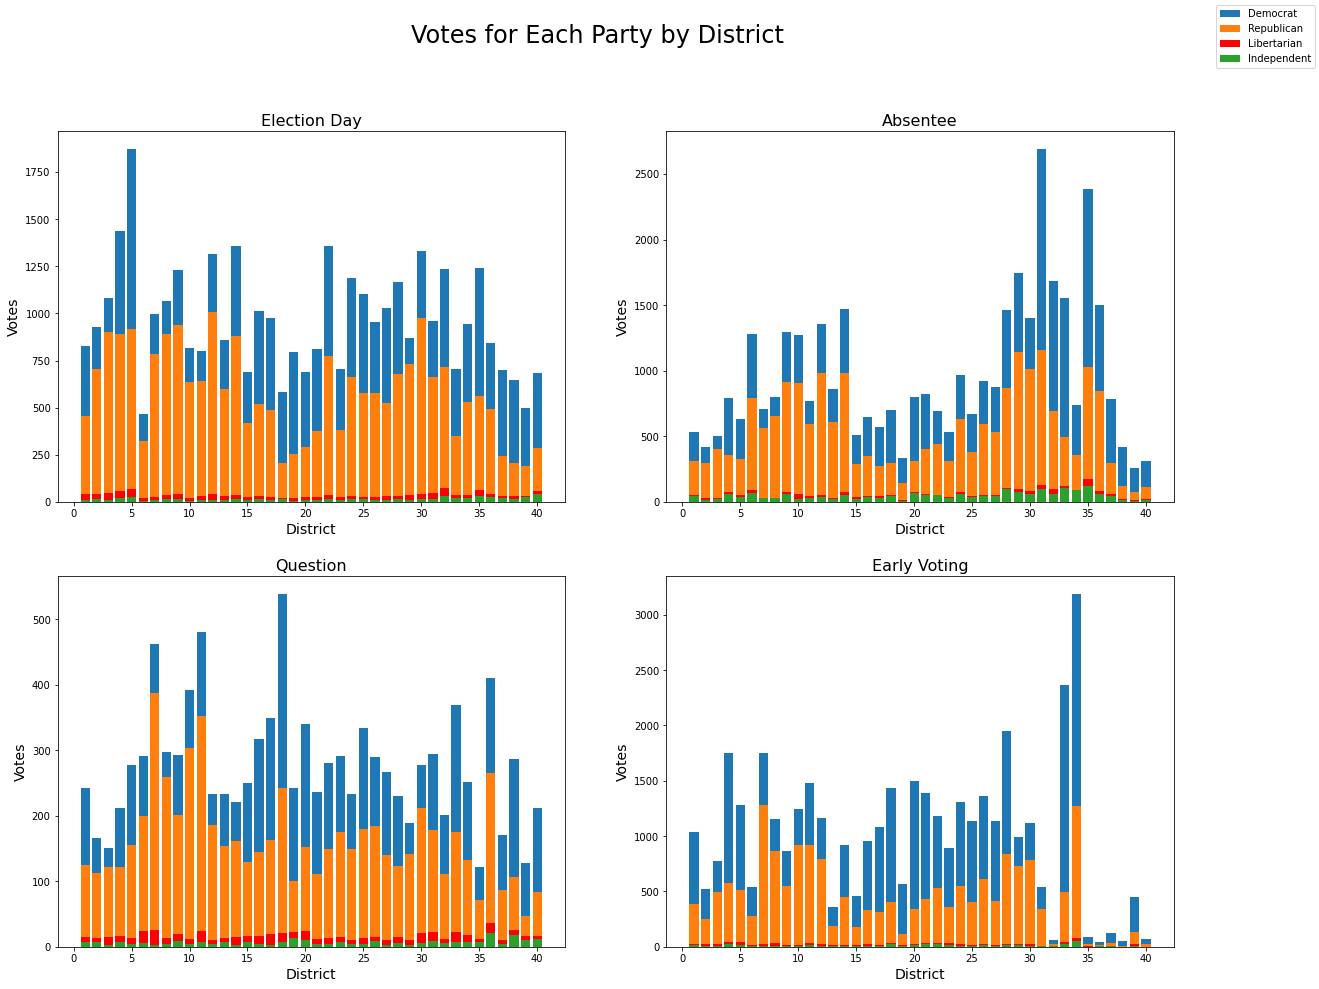

In [ ]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15)

# make the data for the each voting method
ElectionDay = df[df['vote_method'] == 'Election Day']
Absentee = df[df['vote_method'] == 'Absentee']
Question = df[df['vote_method'] == 'Question']
EarlyVoting = df[df['vote_method'] == 'Early Voting']



# create subplots
fig, ax = plt.subplots(nrows=2, ncols=2)

# make data for Election Day
DED = pd.merge(D, ElectionDay, how='inner')
RED = pd.merge(R, ElectionDay, how='inner')
LBED = pd.merge(LB, ElectionDay, how='inner')
ULED = pd.merge(UL, ElectionDay, how='inner')

# plot in a stack manner
ax[0,0].bar(DED['state_districtid'], DED['votes'], bottom = RED['votes'], label = 'Democrat')
ax[0,0].bar(RED['state_districtid'], RED['votes'], bottom = LBED['votes'], label = 'Republican')
ax[0,0].bar(LBED['state_districtid'],LBED['votes'], bottom = ULED['votes'], label = 'Libertarian', color='r')
ax[0,0].bar(ULED['state_districtid'],ULED['votes'], label = 'Independent')

# make legend
ax[0,0].set_xlabel('District', fontsize=14)
ax[0,0].set_ylabel('Votes', fontsize=14)
ax[0,0].set_title('Election Day', fontsize=16)



# make data for Absentee
DA = pd.merge(D, Absentee, how='inner')
RA = pd.merge(R, Absentee, how='inner')
LBA = pd.merge(LB, Absentee, how='inner')
ULA = pd.merge(UL, Absentee, how='inner')

# plot in a stack manner
ax[0,1].bar(DA['state_districtid'], DA['votes'], bottom = RA['votes'])
ax[0,1].bar(RA['state_districtid'], RA['votes'], bottom = LBA['votes'])
ax[0,1].bar(LBA['state_districtid'],LBA['votes'], bottom = ULA['votes'], color='r')
ax[0,1].bar(ULA['state_districtid'],ULA['votes'])

# make legend
ax[0,1].set_xlabel('District', fontsize=14)
ax[0,1].set_ylabel('Votes', fontsize=14)
ax[0,1].set_title('Absentee', fontsize=16)



# make data for Question
DQ = pd.merge(D, Question, how='inner')
RQ = pd.merge(R, Question, how='inner')
LBQ = pd.merge(LB, Question, how='inner')
ULQ = pd.merge(UL, Question, how='inner')

# plot in a stack manner
ax[1,0].bar(DQ['state_districtid'], DQ['votes'], bottom = RQ['votes'])
ax[1,0].bar(RQ['state_districtid'], RQ['votes'], bottom = LBQ['votes'])
ax[1,0].bar(LBQ['state_districtid'],LBQ['votes'], bottom = ULQ['votes'], color='r')
ax[1,0].bar(ULQ['state_districtid'],ULQ['votes'])

# make legend
ax[1,0].set_xlabel('District', fontsize=14)
ax[1,0].set_ylabel('Votes', fontsize=14)
ax[1,0].set_title('Question', fontsize=16)



# make data for Early Voting
DEV = pd.merge(D, EarlyVoting, how='inner')
REV = pd.merge(R, EarlyVoting, how='inner')
LBEV = pd.merge(LB, EarlyVoting, how='inner')
ULEV = pd.merge(UL, EarlyVoting, how='inner')

# plot in a stack manner
ax[1,1].bar(DEV['state_districtid'], DEV['votes'], bottom = REV['votes'])
ax[1,1].bar(REV['state_districtid'], REV['votes'], bottom = LBEV['votes'])
ax[1,1].bar(LBEV['state_districtid'],LBEV['votes'], bottom = ULEV['votes'], color='r')
ax[1,1].bar(ULEV['state_districtid'],ULEV['votes'])

# make legend
ax[1,1].set_xlabel('District', fontsize=14)
ax[1,1].set_ylabel('Votes', fontsize=14)
ax[1,1].set_title('Early Voting', fontsize=16)


fig.suptitle('Votes for Each Party by District', fontsize=24)
fig.legend()

plt.show()

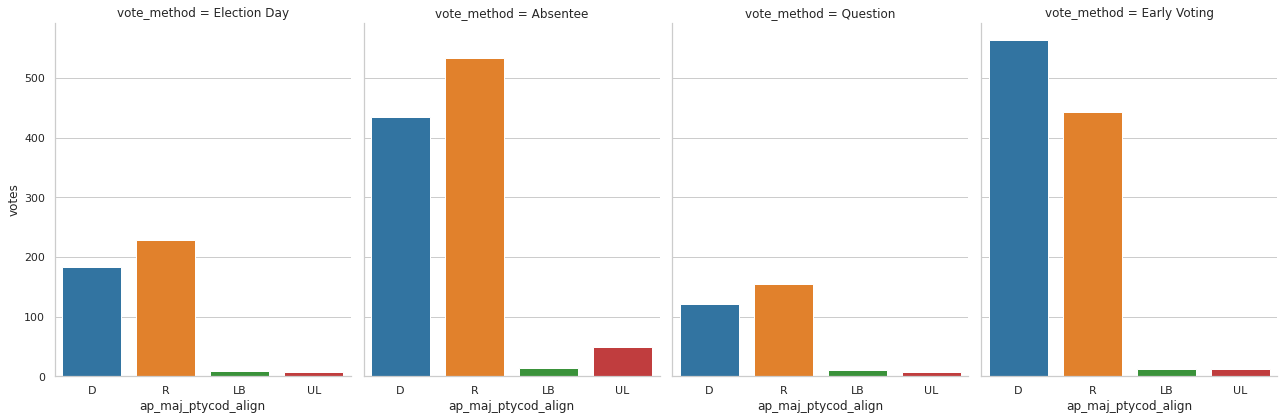

In [ ]:
sns.set_theme(style="whitegrid")
pal = sns.color_palette('tab10', n_colors=4)
graph = sns.FacetGrid(union, col='vote_method', height=6, aspect=.75)
graph.map(sns.barplot, 'ap_maj_ptycod_align', 'votes', palette=pal, order=['D', 'R', 'LB', 'UL'], ci=None)

# Statistical Analyses

Two-Way ANOVAs were conducted between different variables to determine if there was significant interaction.

This interaction is then shown on following interaction plots.

In [ ]:
# Two-way ANOVA conducted on the voting method and political party with the total vote count.

model = ols('votes ~ C(vote_method) + C(ap_maj_ptycod_align) + C(vote_method):C(ap_maj_ptycod_align)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(vote_method),6.628601e+06,3.0,94.902827,8.392693e-58
C(ap_maj_ptycod_align),3.052647e+07,3.0,437.052762,2.908605e-223
C(vote_method):C(ap_maj_ptycod_align),6.195637e+06,9.0,29.568004,4.213646e-49
Residual,5.187244e+07,2228.0,NaN,NaN


In [ ]:
# Two-way ANOVA conducted on the voting method and the district ID with the total vote count.

model = ols('votes ~ C(vote_method) + C(state_districtid) + C(vote_method):C(state_districtid)', data=union).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(vote_method),4.961653e+06,3.0,46.633752,3.639440e-29
C(state_districtid),7.797154e+06,39.0,5.637243,1.901467e-25
C(vote_method):C(state_districtid),6.887518e+06,117.0,1.659863,1.970706e-05
Residual,7.390987e+07,2084.0,NaN,NaN


In [ ]:
# Two-way ANOVA conducted on the voting method and the district area with the total vote count.

model = ols('votes ~ C(vote_method) + C(dist_area) + C(vote_method):C(dist_area)', data=union).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(vote_method),4.961653e+06,3.0,46.633752,3.639440e-29
C(dist_area),7.797154e+06,39.0,5.637243,1.901467e-25
C(vote_method):C(dist_area),6.887518e+06,117.0,1.659863,1.970706e-05
Residual,7.390987e+07,2084.0,NaN,NaN


Text(0.5, 1.0, 'Interaction Plot of Political Party and Voting Method')

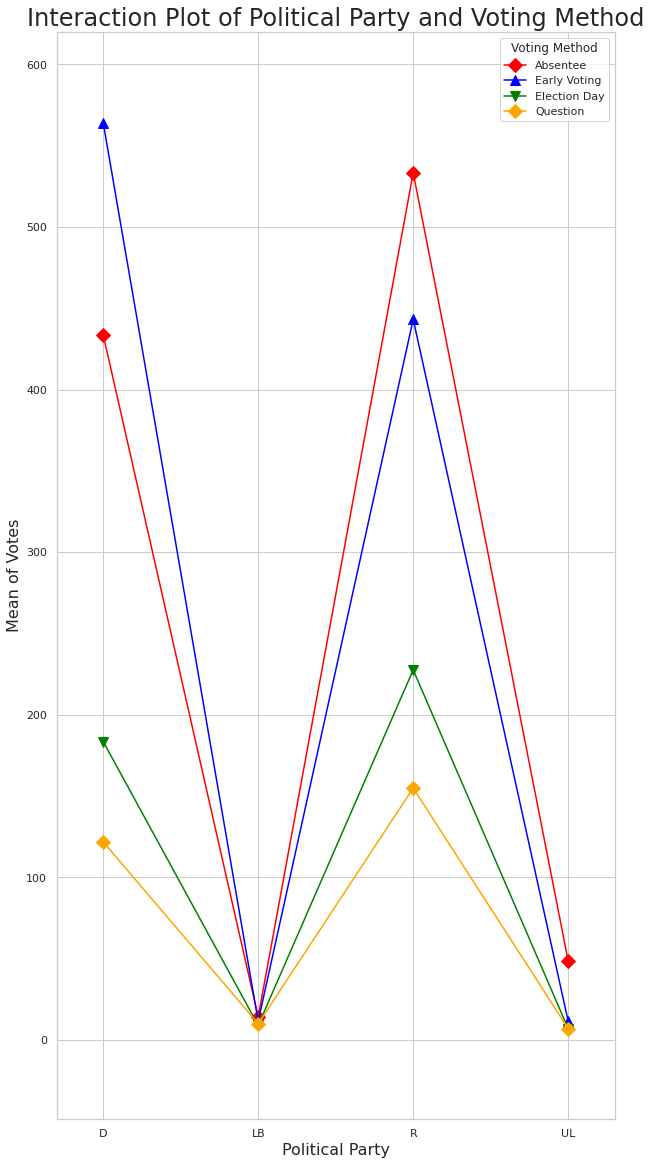

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,20)

fig = interaction_plot(df['ap_maj_ptycod_align'], df['vote_method'], df['votes'],
             colors=['red','blue', 'green', 'orange'], markers=['D','^', 'v', 'D'], ms=10, legendtitle='Voting Method')

plt.ylabel('Mean of Votes', fontsize=16)
plt.xlabel('Political Party', fontsize=16)
plt.title("Interaction Plot of Political Party and Voting Method", fontsize=24)

Text(0.5, 1.0, 'Interaction Plot of Voting Method and Political Party')

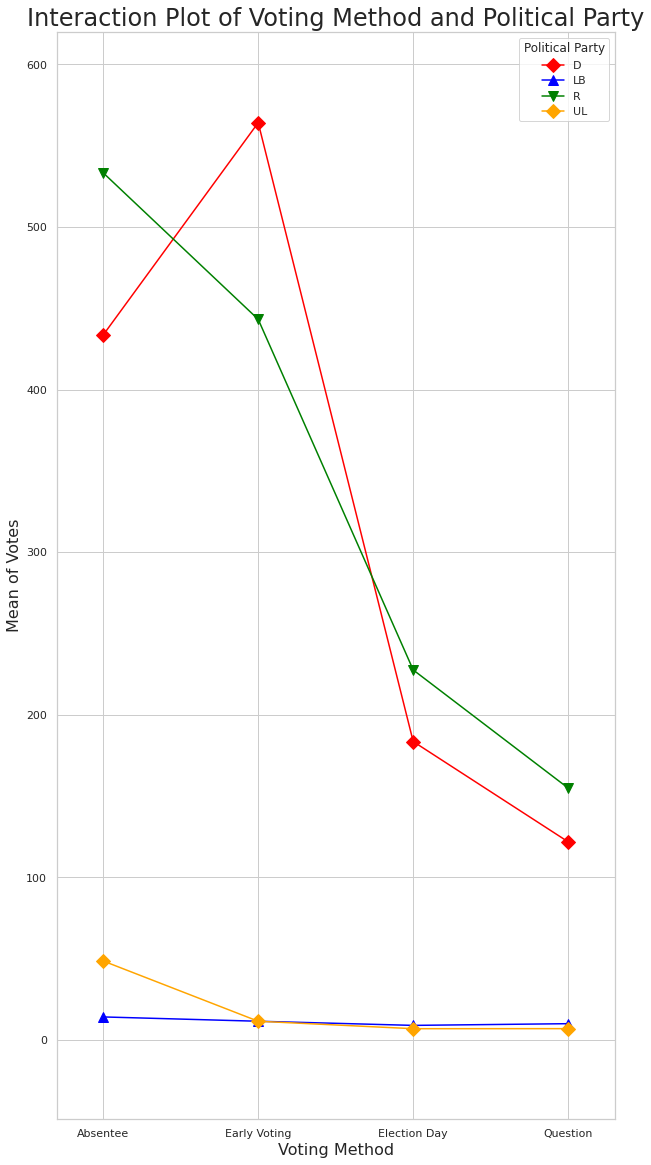

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,20)

fig = interaction_plot(df['vote_method'], df['ap_maj_ptycod_align'], df['votes'],
             colors=['red','blue', 'green', 'orange'], markers=['D','^', 'v', 'D'], ms=10, legendtitle='Political Party')

plt.ylabel('Mean of Votes', fontsize=16)
plt.xlabel('Voting Method', fontsize=16)
plt.title("Interaction Plot of Voting Method and Political Party", fontsize=24)

Text(0.5, 1.0, 'Interaction Plot of Voting Method and District ID')

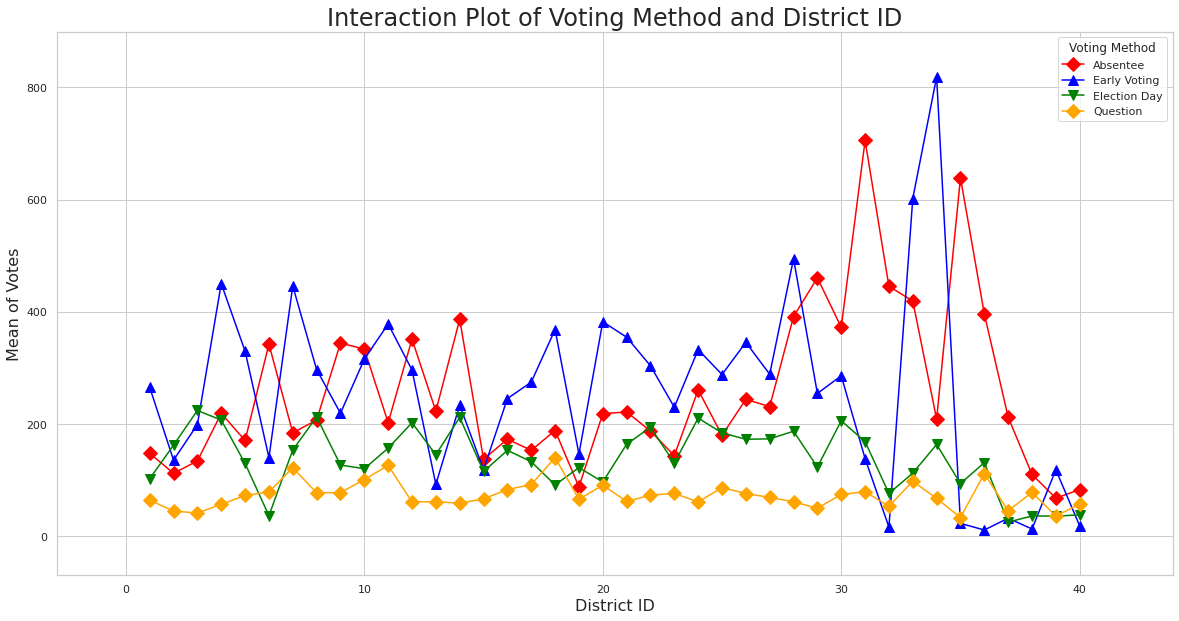

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

fig = interaction_plot(union['state_districtid'], union['vote_method'], union['votes'],
             colors=['red','blue', 'green', 'orange'], markers=['D','^', 'v', 'D'], ms=10, legendtitle='Voting Method')

plt.ylabel('Mean of Votes', fontsize=16)
plt.xlabel('District ID', fontsize=16)
plt.title("Interaction Plot of Voting Method and District ID", fontsize=24)

Text(0.5, 1.0, 'Interaction Plot of Voting Method and District Area')

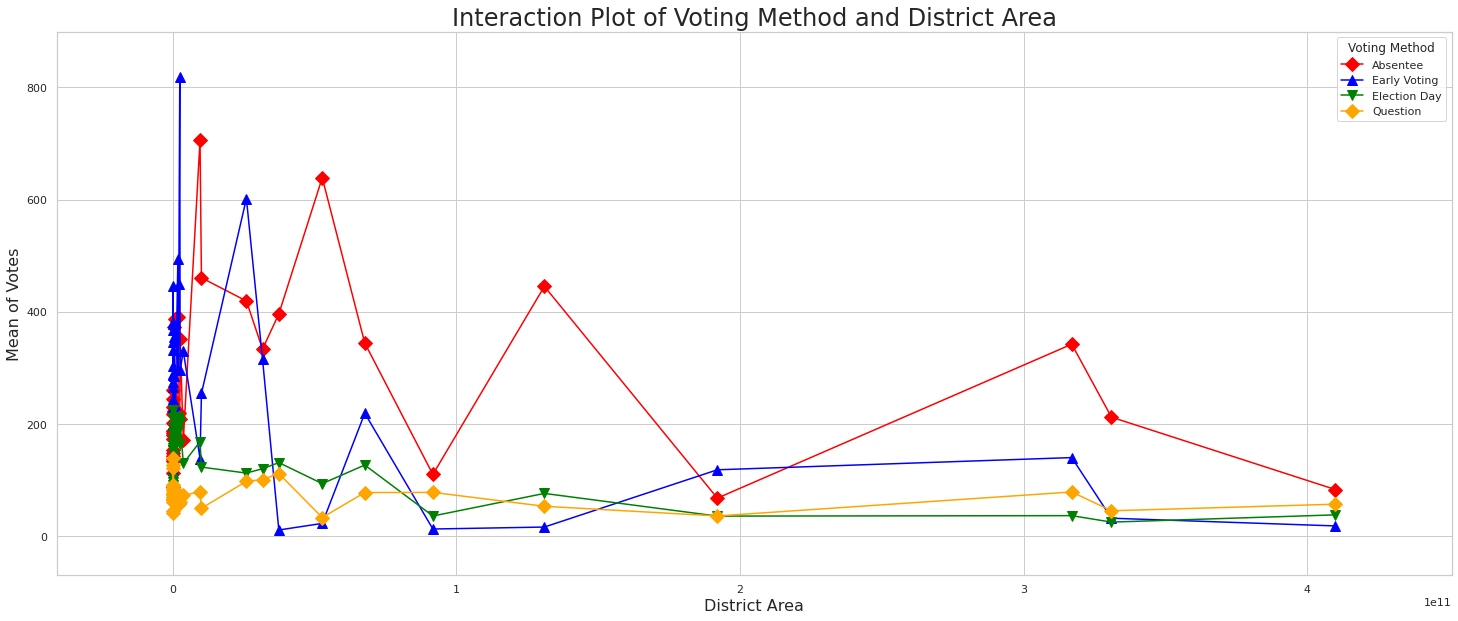

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (25,10)

fig = interaction_plot(union['dist_area'], union['vote_method'], union['votes'],
             colors=['red','blue', 'green', 'orange'], markers=['D','^', 'v', 'D'], ms=10, legendtitle='Voting Method')

plt.ylabel('Mean of Votes', fontsize=16)
plt.xlabel('District Area', fontsize=16)
plt.title("Interaction Plot of Voting Method and District Area", fontsize=24)

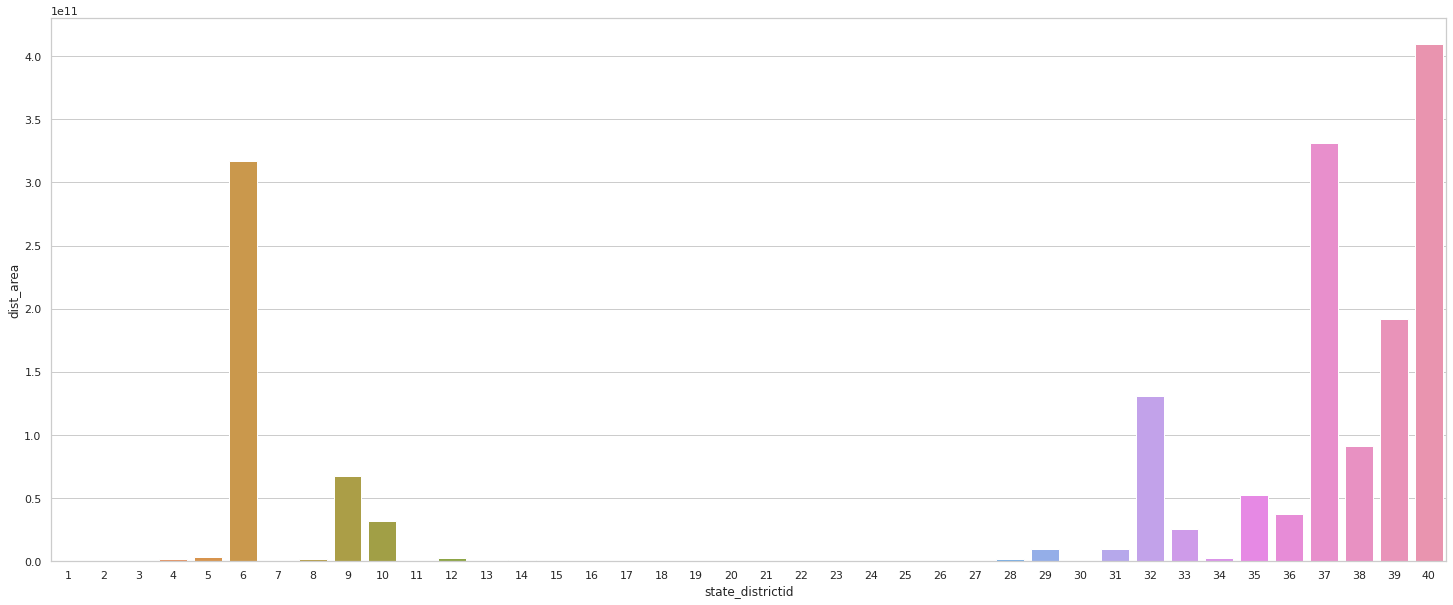

In [ ]:
g = sns.barplot(x=union['state_districtid'], y=union['dist_area'])